# for this update : 
### 1-cleared the most of the visualization sells that i didn't nead anymore (since i covered the decisions related to it) 
### 2-cleaned the code . 
### 3-applied ml algorithm to predict the survival missing values on the testing data and got 77.2 accuracy.

In [51]:
x=1 # hello from the other side :|

In [52]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.linear_model import LogisticRegression

In [53]:
plt.rc("font", size=14)
sns.set(style="dark") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)#style="whitegrid"

In [54]:
 # i did the copy here just to cover an error on the sumbmission bellow .... # you can just #hash it if you wan :) 
training_data_original=pd.read_csv('Desktop/titanic/train.csv')
testing_data_original=pd.read_csv('Desktop/titanic/test.csv')
# the testing is same as training but it doesn't have 'Survived' available 
training_data=training_data_original.copy()
testing_data=testing_data_original.copy()

In [55]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


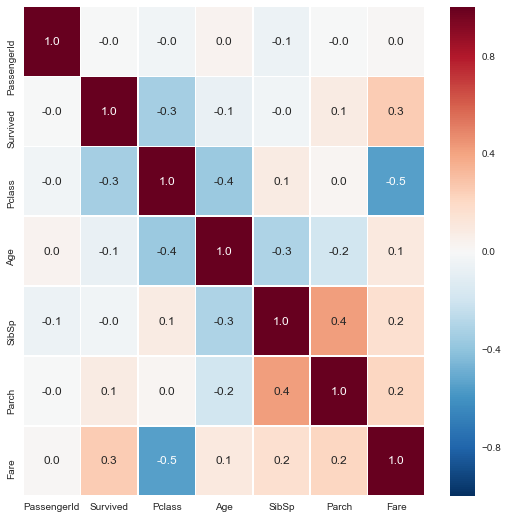

In [57]:
a,ax=plt.subplots(figsize=(9,9))
sns.heatmap(training_data.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
#there is correlation between survived and (Pclass,Fare,parch,age)

### making one data frame to make the variables changes to everything  

In [58]:
training_data_length=len(training_data)# for splitting later to the origional state 
print('the length of the training data is :',training_data_length)
df=pd.concat(objs=[training_data,testing_data],axis=0).copy()
df=df.reset_index(drop=True)

the length of the training data is : 891


In [59]:
df.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


In [60]:
#training_data.info() # there is null values at : 'Age' , 'Cabin' , 'Embarked','Fare'
#df.loc[pd.isnull(df['Fare'])] # to see the nan Fare value 
print('the Cabins unique values count is :',len(training_data['Cabin'].unique()))
print('the null values on Cabin equal:',pd.isnull(training_data['Cabin']).sum())

the Cabins unique values count is : 148
the null values on Cabin equal: 687


## filling the only null value on Fare,changing the (Sex,Cabins,Embarked) to numbers, reducing the tickets unique values

In [61]:
#filling the Fare nans(which is just one row)
df.loc[pd.isnull(df['Fare'])==True,'Fare']=df.Fare.median()

#converting male to 1 , female to 0
df.loc[df['Sex']=='male','Sex'],df.loc[df['Sex']=='female','Sex']=1,0

#renaming the data 'Cabins' from Characters to numbers

df.Cabin.fillna(8,inplace=True) 
df.loc[df.Cabin.str.contains('T',na=False),'Cabin']=8 #the only Cabin that have T in all of the data 

# from A to 1, from B to 2 , etc..
a=list('ABCDEFG') ; b=list(range(1,len(a)+1))  
for x in range(len(a)):
    df.loc[df.Cabin.str.contains(a[x],na=False),'Cabin']=b[x]
    
    
#reducing the Tickets unique vales         
print('the Ticket length befor the change is :',len(df.Ticket.unique()))
unique_tickets=df.Ticket.unique()
for x in range((len(df)-1)):
    unique_tickets=df.loc[x,'Ticket'].split(' ')
    if(len(unique_tickets)==1):
        
        if unique_tickets[0]=='1'or'2'or'3'or'4'or'5'or'6'or'7'or'8'or'9':
            unique_tickets=(unique_tickets[0][0]+unique_tickets[0][1]+unique_tickets[0][2])
            
        else:
            pass
        
    elif len(unique_tickets)==2:
        unique_tickets=unique_tickets[0]

    elif len(unique_tickets)==3 :
        unique_tickets=unique_tickets[0]
    df.loc[x,'Ticket']=unique_tickets

#chaging the 'Embarked' into numbers 
    
df['Embarked']=df['Embarked'].replace('S',np.int32(1))
df['Embarked']=df['Embarked'].replace('Q',np.int32(2))
df['Embarked']=df['Embarked'].replace('C',np.int32(3))


print('the Ticket length after the change is  :',len(df.Ticket.unique()))
print('how the Tickets numbers look like after the change :',unique_tickets[0:4])
print('the unique Cabin values are :',df['Cabin'].unique())
print('the unique Pclass values are :',df['Pclass'].unique())

the Ticket length befor the change is : 929
the Ticket length after the change is  : 186
how the Tickets numbers look like after the change : 359
the unique Cabin values are : [8 3 5 7 4 1 2 6]
the unique Pclass values are : [3 1 2]


In [62]:
df.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,8,1.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5
1,38.0,3,3.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC


### ### Calssifying the names into "a useful feature" ('Title')

In [63]:
# Define get_title function to extract titles from passenger names
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1) # 1 to erase the space befor the title
    return ""

#testing it..
print(get_title('Braund, Mr. Owen Harris'))
#working

# Create a new feature 'Title' that contains the titles of passenger names


df['Title'] = df['Name'].apply(get_title)
del df['Name'] # delete the origional column 'Name' since we don't need it anymore 

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs') 

Mr


### does the title mean anything anyways ? 

In [64]:
df.groupby(['Sex','Pclass','Title']).aggregate(np.median).head(10)  # groub them by the features and get the median value
# so the title actually matters !
#( but survived changes the value when Pclass changes: as you can see Miss survival changed when she was on Pclass 1 and 2 )
# we have to search ages by using the 3 of them ('Sex','Pclass','Title')

Age  Embarked      Fare  Parch  PassengerId  SibSp  \
Sex Pclass Title                                                           
0   1      Countess  33.0       1.0   86.5000    0.0        760.0    0.0   
           Dona      39.0       3.0  108.9000    0.0       1306.0    0.0   
           Dr        49.0       1.0   25.9292    0.0        797.0    0.0   
           Lady      48.0       3.0   39.6000    0.0        557.0    1.0   
           Miss      30.0       3.0   99.9625    0.0        529.5    0.0   
           Mrs       45.0       2.0   78.1125    0.0        853.5    1.0   
    2      Miss      20.0       1.0   19.5000    0.0        597.0    0.0   
           Mrs       30.5       1.0   26.0000    0.0        547.0    1.0   
    3      Miss      18.0       1.0    8.0500    0.0        613.0    0.0   
           Mrs       31.0       1.0   15.5000    1.0        658.0    1.0   

                     Survived  
Sex Pclass Title               
0   1      Countess       1.0  
           Dona           NaN  
           Dr             1.0  
           Lady           1.0  
           Miss           1.0  
           Mrs            1.0  
    2      Miss           1.0  
           Mrs            1.0  
    3      Miss           0.5  
           Mrs            0.5

### well, it does ! so we will use it to help us fill the na values on the 'Age' column 

### filling the 'Age'(given the Pclass,Sex,Title) and the 'Embarked' nans 

In [65]:
# filling the Age nans by using the 3 features 
for a in df.Sex.unique():
        for b in df.Pclass.unique():
            for c in df.loc[(df['Sex']==a) & (df['Pclass']==b),'Title'].unique():
                # get the median Age of the not-null Ages that fit the condition 
                the_median=df.loc[(pd.notnull(df['Age'])) & (df['Pclass']==b) &
                                       (df['Sex']==a) & (df['Title']==c),'Age'].median()

               # set the median Age on the null Ages that fit the condition 
                df.loc[(pd.isnull(df['Age'])) & (df['Pclass']==b) & 
                                  (df['Sex']==a) &(df['Title']==c),'Age']=the_median

#filling the nans on the 'Embarked'
#df.loc[pd.isnull(df['Embarked'])]#61,829 # less than training_data_length(891) so the nulls on the training data 
# dropping them 
df=df.drop((df.index[pd.isnull(df['Embarked'])])) #61,829
training_data_length=training_data_length-2                 

#(df[pd.isnull(df['Age'])])#no nulls 
#df[pd.isnull(df['Embarked'])]#no nulls 

In [66]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'Title'],
      dtype='object')

In [67]:
for i in df.columns:
     print ('for the column %s :'%i,df[i].unique())
    

for the column Age : [ 22.    38.    26.    35.    54.     2.    27.    14.     4.    58.    20.
  39.    55.    30.    31.    34.    15.    28.     8.    19.    18.    40.
  45.    66.    42.    21.     3.     7.    49.    29.    65.    41.5   28.5
   5.    11.     6.    17.    32.    16.    25.     0.83  33.    23.    24.
  46.    59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5
  51.    55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5
  62.    41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.
  48.     0.75  53.    57.    80.    70.    24.5    0.67  30.5    0.42
  34.5   74.    22.5   18.5   67.    76.    26.5   60.5   11.5    0.33
   0.17  38.5 ]
for the column Cabin : [8 3 5 7 4 1 2 6]
for the column Embarked : [ 1.  3.  2.]
for the column Fare : [   7.25     71.2833    7.925    53.1       8.05      8.4583   51.8625
   21.075    11.1333   30.0708   16.7      26.55     31.275     7.8542
   16.       29.125    13.       18.     

### looking at the unique values for the columns 

In [68]:
print('survived : ', df.Survived.unique())
print('Sex : ',df.Sex.unique())  # 1 for male , 0 for female 
print('Pclass : ',df.Pclass.unique())#Ticket class
print('SibSp :',df.SibSp.unique())# of siblings / spouses aboard the Titanic
print('Embarked : ',df.Embarked.unique()) # Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
print('Parch : ',df.Parch.unique())# of parents / children aboard the Titanic
print('Cabin :',df.Cabin.unique())
print('Age :',df.Age.unique())
#print(df['Fare']) # the ticket cost  # bad idea ... (alot of unique values)
# the only nans are the survived on the testing data 

survived :  [  0.   1.  nan]
Sex :  [1 0]
Pclass :  [3 1 2]
SibSp : [1 0 3 4 2 5 8]
Embarked :  [ 1.  3.  2.]
Parch :  [0 1 2 5 3 4 6 9]
Cabin : [8 3 5 7 4 1 2 6]
Age : [ 22.    38.    26.    35.    54.     2.    27.    14.     4.    58.    20.
  39.    55.    30.    31.    34.    15.    28.     8.    19.    18.    40.
  45.    66.    42.    21.     3.     7.    49.    29.    65.    41.5   28.5
   5.    11.     6.    17.    32.    16.    25.     0.83  33.    23.    24.
  46.    59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5
  51.    55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5
  62.    41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.
  48.     0.75  53.    57.    80.    70.    24.5    0.67  30.5    0.42
  34.5   74.    22.5   18.5   67.    76.    26.5   60.5   11.5    0.33
   0.17  38.5 ]


## plots to show the relationship with survival rate and some columns 

so having relations have an effective percentage of the survival 


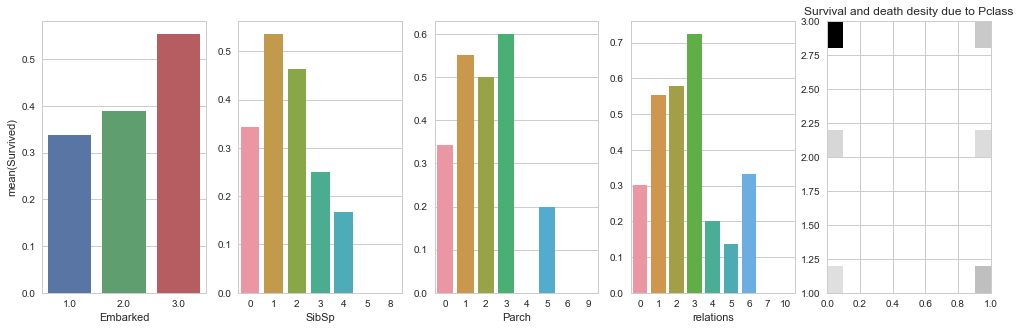

In [69]:
fig,ax=plt.subplots(1,5,figsize=(17,5))
sns.barplot(df['Embarked'],df['Survived'],ci=False,ax=ax[0])
sns.barplot(df['SibSp'],df['Survived'],ci=False,ax=ax[1]);ax[1].set_ylabel('')
sns.barplot(df['Parch'],df['Survived'],ci=False,ax=ax[2]);ax[2].set_ylabel('')

df['relations']=df['SibSp']+df['Parch']
sns.barplot(df['relations'],df['Survived'],ci=False,ax=ax[3]);ax[3].set_ylabel('')

ax[4].hist2d(x=training_data['Survived'],y=training_data['Pclass']);ax[4].set_title('Survival and death desity due to Pclass')

print('so having relations have an effective percentage of the survival ')

In [70]:
df[:training_data_length].head(2)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,relations
0,22.0,8,1.0,7.2500,0,1,3,1,1,0.0,A/5,Mr,1
1,38.0,3,3.0,71.2833,0,2,1,0,1,1.0,PC,Mrs,1


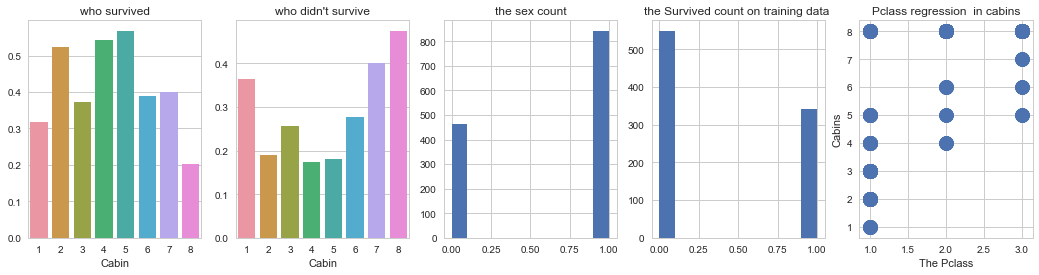

In [71]:
fig,ax=plt.subplots(1,5,figsize=(18,4))
sns.barplot(df['Cabin'],df['Survived']==1,ci=False,ax=ax[0]); ax[0].set_title('who survived');ax[0].set_ylabel(' ')
sns.barplot(df['Cabin'],df['Survived']==0,ci=False,ax=ax[1]); ax[1].set_title('who didn\'t survive');ax[1].set_ylabel(' ')
#df.Sex.plot('hist')
ax[2].hist(df.Sex);ax[2].set_title('the sex count')
ax[3].hist(training_data.Survived);ax[3].set_title('the Survived count on training data ')
ax[4].scatter(df['Pclass'],df['Cabin'],s=200) # s : the size of the dotts
ax[4].set_xlabel('The Pclass');ax[4].set_ylabel('Cabins');ax[4].set_title('Pclass regression  in cabins')

# Sex vs Cabins vs Survival 

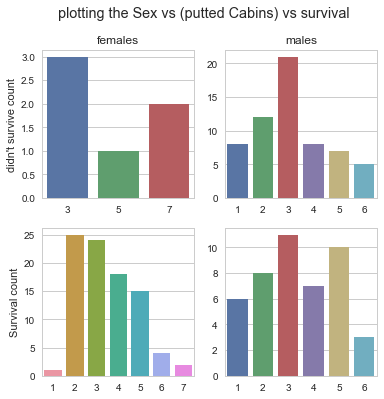

In [72]:
fig,ax=plt.subplots(2,2,figsize=(6,6))
fig.suptitle('plotting the Sex vs (putted Cabins) vs survival')
sns.countplot('Cabin',data=df.loc[((df.Cabin!=8) & (df.Sex==0) & (df.Survived==0))],ax=ax[0,0]);ax[0,0].set_ylabel('didn\'t survive count');ax[0,0].set_xlabel('');ax[0,0].set_title('females')
sns.countplot('Cabin',data=df.loc[((df.Cabin!=8) & (df.Sex==1)& (df.Survived==0))],ax=ax[0,1]);ax[0,1].set_ylabel('');ax[0,1].set_xlabel('');ax[0,1].set_title('males')
sns.countplot('Cabin',data=df.loc[((df.Cabin!=8) & (df.Sex==0)& (df.Survived==1))],ax=ax[1,0]);ax[1,0].set_ylabel('Survival count');ax[1,0].set_xlabel('')
sns.countplot('Cabin',data=df.loc[((df.Cabin!=8) & (df.Sex==1)& (df.Survived==1))],ax=ax[1,1]);ax[1,1].set_ylabel('');ax[1,1].set_xlabel('')

In [73]:
# making a dataFrame to plot the people who didn't Survive
temp=df[:training_data_length]
temp2=temp.copy() # replace 0 to 1 and 1 to 0 for the plotting 
temp2['Survived']=temp2['Survived'].replace(0,np.int32(2))
temp2['Survived']=temp2['Survived'].replace(1,np.int32(0))
temp2['Survived']=temp2['Survived'].replace(2,np.int32(1))
temp2['Age_Classification']=(temp2.loc[:,'Age']/40).astype(int)

[(0, 1.1), (0.43, 70)]

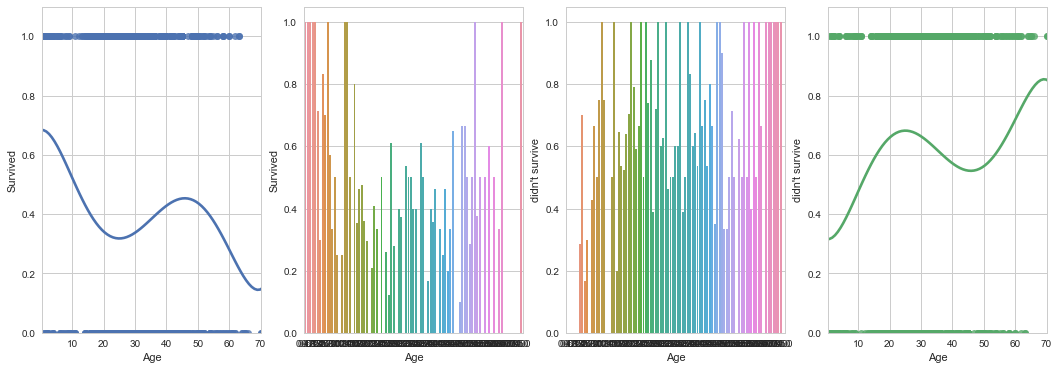

In [74]:
temp=df[:training_data_length] # i made it because there is nulls on the age for the training 
fig,ax=plt.subplots(1,4,figsize=(18,6))

a=sns.regplot(data=temp,x='Age',y='Survived',ci=False,order=5,ax=ax[0])
a.set(xlim=(0.43, 70),ylim=(0,1.1))
w=sns.barplot(temp['Age'],temp['Survived']==1,ci=None,ax=ax[1]) # survived !
w.set(ylabel='Survived')


w=sns.barplot(temp['Age'],temp['Survived']==0,ci=None,ax=ax[2])
w.set( ylabel='didn\'t survive')
a=sns.regplot(data=temp2,x='Age',y='Survived',ci=False,order=5,ax=ax[3])#,set_ylabel('dd'))
a.set_ylabel('didn\'t survive')
a.set(xlim=(0.43, 70),ylim=(0,1.1))
#a.legend(['survived','didn\'t survive'])# 

In [75]:
print(np.max(temp.Age))
print(np.min(temp.Age))

80.0
0.42


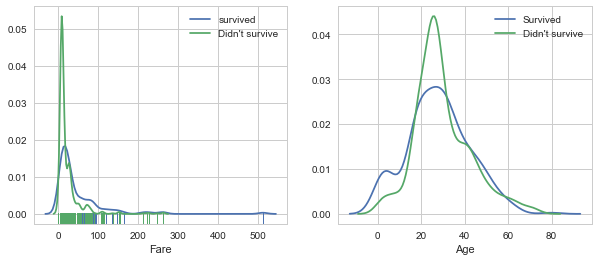

In [76]:
fig,ax=plt.subplots(1,2,figsize=(10,4))

sns.distplot(temp['Fare'][temp['Survived']==1], hist=False,rug=True,label='survived',ax=ax[0])
sns.distplot(temp['Fare'][temp['Survived']==0], hist=False,rug=True,label='Didn\'t survive',ax=ax[0])

sns.distplot(temp['Age'][temp['Survived']==1],label='Survived', hist=False,ax=ax[1])
sns.distplot(temp['Age'][temp['Survived']==0], hist=False,label='Didn\'t survive',ax=ax[1])

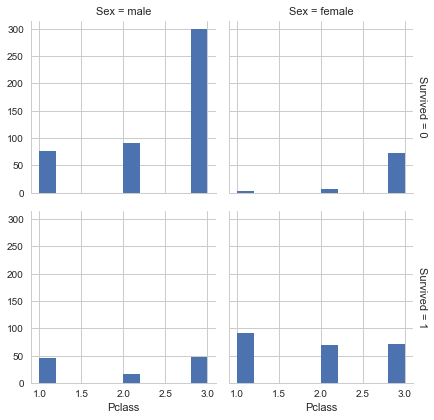

In [77]:
grid =sns.FacetGrid(training_data,row='Survived',col='Sex',margin_titles=True) # FaceGrid : it makes the histograms ready in seaborn 
                                                # margin_titles : to make the titles show on like its a data frames ( on the side and top )
grid.map(plt.hist,'Pclass')

In [78]:
# is the titanic movie right about the captin death tho ? 
df[df['Title']=='Capt']
#the captin of the titanic didn't survive...
# well, that was sad lol 

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,relations
745,70.0,2,1.0,71.0,1,746,1,1,1,0.0,WE/P,Capt,2


In [79]:
#plt.scatter(training_data['Survived'],training_data['Fare'])
# and ladies and gentlements , we take from this plot that the people who payed about 500 pounds simply survived (at least in the training data )
# unhash code to see it with your eyes

### making dummies for training and testing data (for 'Title','Cabin','Pclass','Embarked')

In [80]:
dummies_titles = pd.get_dummies(df['Title'],prefix='Title')
df = pd.concat([df,dummies_titles],axis=1)


dummies_titles = pd.get_dummies(df['Cabin'],prefix='Cabin')
df = pd.concat([df,dummies_titles],axis=1)


dummies_titles = pd.get_dummies(df['Pclass'],prefix='Pclass')
df = pd.concat([df,dummies_titles],axis=1)


dummies_titles = pd.get_dummies(df['Embarked'],prefix='Embarked')
df = pd.concat([df,dummies_titles],axis=1)

# deleting the columns that we changed 
del df['Title'] ; del df['Cabin'] ; del df['Pclass'] ; del df['Embarked']
del df['PassengerId']

del df['Ticket']

# saving the changes 
#training_data = df[:training_data_length].copy()
#testing_data = df[training_data_length:].copy()
#del testing_data['Survived'] # it is generated as nan by the first concat (while gathering the data )
#print(len(training_data.columns))
#print(len(testing_data.columns))
#print(training_data.columns)
#print(testing_data.columns)

# testing if the data will work or won't on a model 

### seems like i'm working properly to fit a model 

In [81]:
'''survived_sex = training_data[training_data['Survived']==1]['Sex'].value_counts()
dead_sex = training_data[training_data['Survived']==0]['Sex'].value_counts()
temp = pd.DataFrame([survived_sex,dead_sex])
temp.index = ['Survived','Dead']
temp.plot(kind='bar',stacked=True, figsize=(8,4))
plt.legend('FM')'''
x=1
# it is what it is :$

### getting the training data and testing data to their normal form

In [82]:
training_data = df[:training_data_length].copy()
testing_data = df[training_data_length:].copy()
training_data=training_data.reset_index(drop=True)
testing_data=testing_data.reset_index(drop=True)
del testing_data['Survived'] # it is generated as nan by the first concat (while gathering the data )
print ('the length of the training data is ',len(training_data.columns))
print (' the length of the testing data is ',len(testing_data.columns))

the length of the training data is  36
 the length of the testing data is  35


### setting them to basically a temp list (so if i changed it i can just back to this cell to get everything back to normal 

In [83]:
full_data=[training_data.copy(),testing_data.copy()]

# now the data is basically ready to be used for ML

In [84]:
full_data[1].head(2)

,Age,Fare,Parch,Sex,SibSp,relations,Title_Capt,Title_Col,Title_Countess,Title_Don,...,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Pclass_1,Pclass_2,Pclass_3,Embarked_1.0,Embarked_2.0,Embarked_3.0
0,34.5,7.8292,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [85]:
# how ravel works 
full_data[1].loc[:2,'Age'].ravel() # get the first 3 age variables as a ravel (it is basically an array )

array([ 34.5,  47. ,  62. ])

# so from here, since we're sure that everything is working preperly i'm gonna make the validation set so i can test my algorithms ! 

### i'm making the validation out of the training data , so i will take the fifth of the data as a validation sit and i'll use the cross validation for it 

In [86]:
# making a validation set from the training data to validate the models befor applying them to the test 
from sklearn.model_selection import train_test_split
training,validation=train_test_split(full_data[0],test_size=0.2)

print('the length of the trianing is ',len(training))
print('the length of the validation is ',len(validation))

the length of the trianing is  711
the length of the validation is  178


### so i'm trying it on a random model to test if everything on the data is set or not set (withour validation or anything ) 
## just to test that the testing data is clean from nans too and so on ...

In [87]:
#del full_data[0]['Cabin_8']
#del full_data[1]['Cabin_8']
trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

In [88]:
training=full_data[0].copy()
testing=full_data[1].copy()


training_x=training.copy()
del training_x['Survived']  # training_x have everything but the results of the training data 

training_y =trying['Survived'].copy() # training_y have the results of the training (training 'survived' col)


from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()
ss=logistic.fit(training_x,training_y)
result=logistic.predict(testing)

result[:3] # ok 

array([ 0.,  1.,  0.])

### so who knows what model is the best---> we have to make a validation set to valid the models to make sure if it's the best ! 

### make all the features but survived as x_train/x_test and the survived as y_train to predict the y_test
### lets try with a small chunk of the data

### the same code but with deleting the Cabin_8 ( which is the Cabin that have the null values ) ( it's a bit missed up ) 

In [89]:
# normal fit,train without the cross validation 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(training_x,training_y,test_size=0.2,random_state=0)

logistic =LogisticRegression()
logistic.fit(x_train,y_train)
print(logistic.score(x_test,y_test)) # trians the model on the x_test then predicts y_test and gets the percentage of the score
#ss

0.752808988764


In [90]:
#del full_data[0]['Cabin_8']
#del full_data[1]['Cabin_8']
trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

In [91]:
# cross validatoin for logisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# to make it for as a cross validation thingy 
logistic=LogisticRegression()
scores=cross_val_score(logistic,training_x,training_y,cv=5)
#print(scores)
print ('the average accuracy score is ',np.average(scores))

the average accuracy score is  0.826813940202


In [92]:
testing.head(2)

,Age,Fare,Parch,Sex,SibSp,relations,Title_Capt,Title_Col,Title_Countess,Title_Don,...,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Pclass_1,Pclass_2,Pclass_3,Embarked_1.0,Embarked_2.0,Embarked_3.0
0,34.5,7.8292,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


### importing then fitting then predicting .... (fit and predict are in the cross validation here)

In [93]:
trying=full_data[0].copy()
#del trying['Cabin_8'] # deleting it or not doesn't matter much so i'm keeping it anyway 
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()




from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
logistic =LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
kNeibours=KNeighborsClassifier(n_neighbors=3)

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

from sklearn.linear_model import LinearRegression
linearRegression=LinearRegression()

from sklearn.svm import SVR
from sklearn.svm import SVC
svr=SVR()
svc=SVC()
#logistic#regressor
logistic_scores=cross_val_score(logistic,training_x,training_y,cv=5)
kNeibours_scores=cross_val_score(kNeibours,training_x,training_y,cv=5)
tree_scores=cross_val_score(tree,training_x,training_y,cv=5)
forest_scores=cross_val_score(forest,training_x,training_y,cv=5)
linearRegression_scores=cross_val_score(linearRegression,training_x,training_y,cv=5)
svc_scores=cross_val_score(svc,training_x,training_y,cv=5)
svr_scores=cross_val_score(svr,training_x,training_y,cv=5)

#print(logistic_scores)
#print(kNeibours_scores)
#print(tree_scores)
#print(regressor_scores)
#print(forest_scores)
#print(linearRegression_scores)
#print(svc_scores)
#print(svr_scores)


print ('the logistic_scores accuracy score is ',np.average(logistic_scores))
print ('kNeibours_scores accuracy score is ',np.average(kNeibours_scores))
print ('the tree_scores accuracy score is ',np.average(tree_scores))
print ('the forest_scores accuracy score is ',np.average(forest_scores))
print ('the linearRegression_scores accuracy score is ',np.average(linearRegression_scores))
print ('the svc_scores accuracy score is ',np.average(svc_scores))
print ('the svr_scores accuracy score is ',np.average(svr_scores))



the logistic_scores accuracy score is  0.826813940202
kNeibours_scores accuracy score is  0.717685520218
the tree_scores accuracy score is  0.788516473053
the forest_scores accuracy score is  0.791944391544
the linearRegression_scores accuracy score is  0.392426784985
the svc_scores accuracy score is  0.731194058275
the svr_scores accuracy score is  0.222371534912


# how to plot the importance of the columns

In [94]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
logistic =LogisticRegression()


logistic = logistic.fit(training_x, training_y)


logistic.
features = pd.DataFrame()
features['feature'] = training_x.columns
features['importance'] = logistic.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)


features.plot(kind='barh', figsize=(10,10))

SyntaxError: invalid syntax (<ipython-input-94-8dd6d6ced001>, line 9)

In [124]:
from sklearn.linear_model import LogisticRegression
logistic =LogisticRegression()

logistic = logistic.fit(training_x, training_y)


In [118]:
logistic.transform

<bound method deprecated._decorate_fun.<locals>.wrapped of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [140]:
a=logistic.coef_
b=training_x.columns

for i in range(len(b)):
    a[0][i]=np.sqrt((a[0][i])**2)

,Title,Values
10,Title_Dona,0.000000
14,Title_Major,0.004492
1,Fare,0.004651
0,Age,0.032717
2,Parch,0.048241
7,Title_Col,0.080168
23,Cabin_3,0.100135
8,Title_Countess,0.103189
26,Cabin_6,0.112402
21,Cabin_1,0.165323


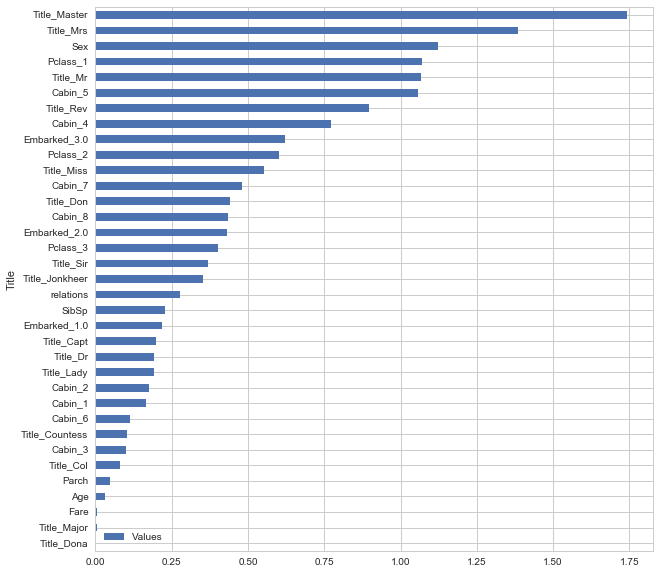

In [149]:
a=pd.DataFrame()
a['Title']=training_x.columns
a['Values']=logistic.coef_[0]
a.sort_values('Values')
a.set_index('Title', inplace=True)
a.sort_values(by=['Values'], ascending=True, inplace=True)
a.plot(kind='barh', figsize=(10,10))
# so it got the age as a really bad feature because it is basically not catagorical .... 
# so as you know the decision trees ADORE the catagorical data since it is build on such logic .... 
# it basically can't use the age because it will overfit when it uses it so that sucks for it :) 

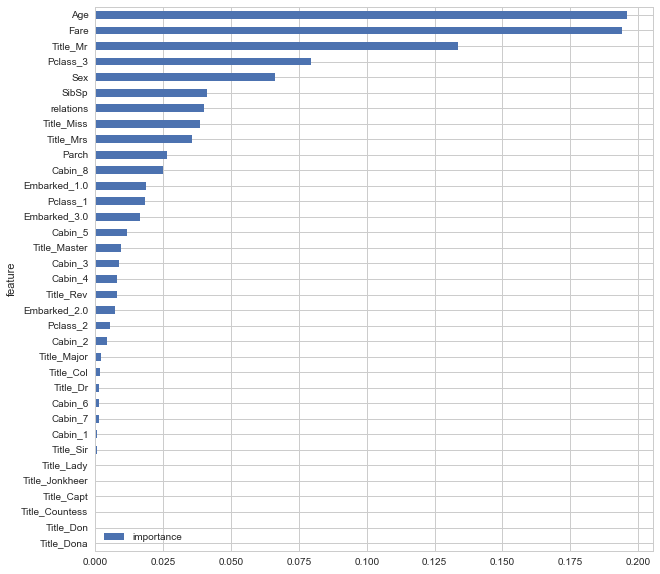

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=5)#, max_features='sqrt')
clf = clf.fit(training_x, training_y)

features = pd.DataFrame()
features['feature'] = training_x.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10,10))

In [ ]:
features['importance']

### logistic_scores ,  tree_scores , forest_scores are good 

In [ ]:
training=full_data[0].copy()
testing=full_data[1].copy()


training_x=training.copy()
del training_x['Survived']  # training_x have everything but the results of the training data 

training_y =trying['Survived'].copy() # training_y have the results of the training (training 'survived' col)

In [ ]:
logistic.fit(training_x,training_y)
logistic_results=logistic.predict(testing)

In [ ]:
tree.fit(training_x,training_y)
tree_result=tree.predict(testing) # same as logistic_result

In [ ]:
forest.fit(training_x,training_y)
forest_results=forest.predict(testing)
#forest_results=ss.predict(testing)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(training_x,training_y,test_size=0.2,random_state=0)

ss=logistic.fit(x_train,y_train)
print('the logistic score is',logistic.score(x_test,y_test))

### after submission i got on the models : 

In [ ]:
#logistic_results#77.2%
#tree_result#75%
#forest_results#72%

In [ ]:
result=np.int64(tree_result)
a=pd.DataFrame(testing_data_original['PassengerId'])
a['Survived']=result
#del a['index']
a.to_csv('submission.csv',index=False)
#a.reindex('PassengerId')
#a

### LogisticRegressionand, forest and the tree  are the best here !  

### a small advice .... visit http://scikit-learn.org/stable/modules/cross_validation.html to see what did i actually do ! 

## i uploaded the result file from this code  and got 77.2% accuracy for doing the simple steps above 